# Curve Fitting with Uncertainties

This notebook demonstrates curve fitting, both linear and non-linear, using the curvefit module of the suncal. The model parameters (e.g. slope and intercept in the linear case) are fit using a least-squares regression. 

Four methods of calculating uncertainty in the fit parameters are used, and are compared here for various types of fit curves. Least-squares should be used in most cases, but the other methods may be useful in some situations.

For each case, some data is generated with random variation to fit a curve to.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

import suncal
from suncal import curvefit

In [2]:
def plotit(f):
    ''' Calculate and plot comparison of fits '''
    cols = 4 if f.markov else 3
    fig, ax = plt.subplots(ncols=cols, figsize=(14,4))
    f.gum.report.plot.summary(ax=ax[0])
    f.lsq.report.plot.summary(ax=ax[1])
    f.montecarlo.report.plot.summary(ax=ax[2])
    if f.markov:
        f.markov.report.plot.summary(ax=ax[3])
        ax[3].set_title('Markov Chain MC')
    ax[0].set_title('GUM')
    ax[1].set_title('Least-Squares')
    ax[2].set_title('Monte Carlo')
    fig.tight_layout()

## Linear Fit

For a straight line, `CurveFit` may be used without specifying a `func` parameter.

|Method (k=1)              | b         | a        |
|-------------------------|---------|---------|
|GUM Approximation         | 0.447 ± 0.059 | -3.2 ± 1.8|
|Monte Carlo               | 0.449 ± 0.062 | -3.3 ± 1.8|
|Least Squares             | 0.447 ± 0.059 | -3.2 ± 1.8|
|Markov-Chain Monte Carlo  | 0.450 ± 0.062 | -3.3 ± 1.8|

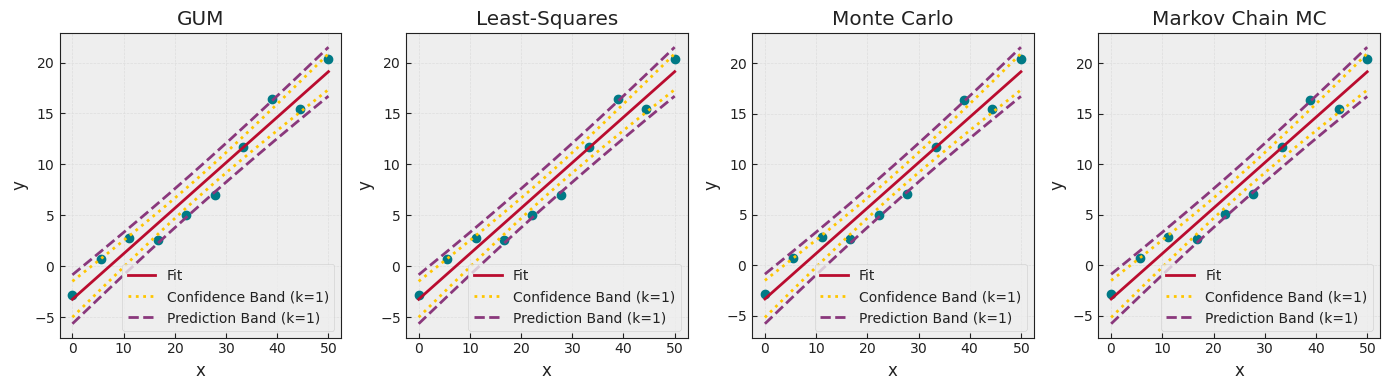

In [3]:
# Generate some data
a, b = -5, .5
uy = 3
x = np.linspace(0,50,num=10)
y = a + b * x + np.random.normal(loc=0, scale=uy, size=len(x))

# Compute the fit
arr = curvefit.Array(x, y, uy=uy)
f = curvefit.CurveFit(arr)
out = f.calculate_all(gum=True, montecarlo=True, lsq=True, markov=True)
display(out)
plotit(out)

# Non-linear fitting

Common functions for quadratic, cubic, polynomial, and exponential are predefined in the CurveFit class and can be used by passing a string argument ('quad', 'cubic', 'poly', or 'exp') to the CurveFit.

|Method (k=1)              | a         | b         | c        |
|-------------------------|---------|---------|---------|
|GUM Approximation         | 2.00 ± 0.13 | -0.91 ± 0.10 | 0.248 ± 0.026|
|Monte Carlo               | 2.00 ± 0.13 | -0.92 ± 0.10 | 0.249 ± 0.025|
|Least Squares             | 2.00 ± 0.13 | -0.912 ± 0.099 | 0.248 ± 0.025|
|Markov-Chain Monte Carlo  | 1.99 ± 0.13 | -0.92 ± 0.11 | 0.251 ± 0.027|

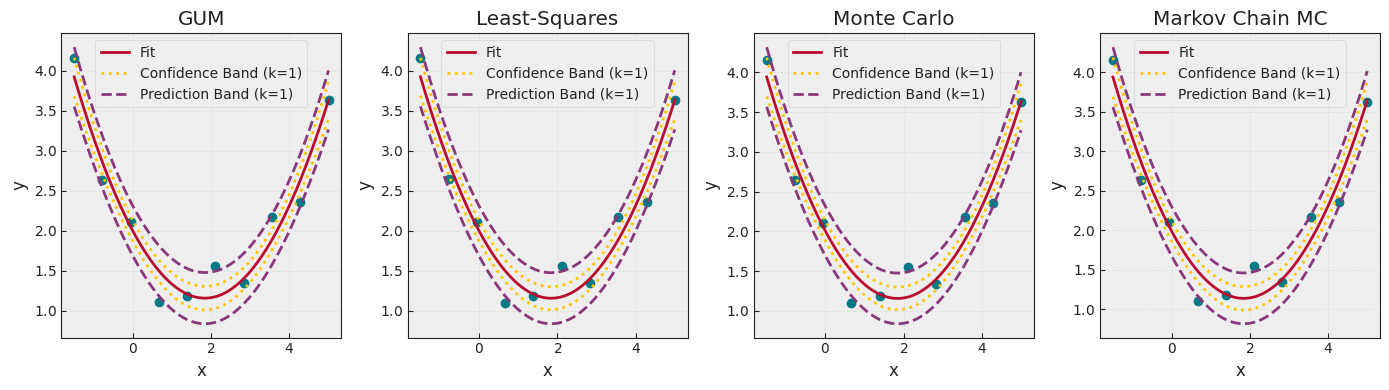

In [4]:
# Generate some quadratic data with noise
a, b, c = 2, -1, 0.25
uy = .3
x = np.linspace(-1.5, 5, num=10)
y = a + b*x + c*x*x + np.random.normal(loc=0, scale=uy, size=len(x))

# Calculate fit and uncertainty
arr = curvefit.Array(x, y, uy=uy)
f = curvefit.CurveFit(func='quad', arr=arr)
out = f.calculate_all()
display(out)
plotit(out)

|Method (k=1)              | a         | b         | c         | d         | e        |
|-------------------------|---------|---------|---------|---------|---------|
|GUM Approximation         | -0.14 ± 0.23 | 0.45 ± 0.52 | -1.97 ± 0.41 | -0.65 ± 0.57 | 1.29 ± 0.26|
|Monte Carlo               | -0.14 ± 0.22 | 0.44 ± 0.51 | -1.96 ± 0.39 | -0.66 ± 0.56 | 1.29 ± 0.26|
|Least Squares             | -0.14 ± 0.22 | 0.45 ± 0.52 | -1.97 ± 0.39 | -0.65 ± 0.57 | 1.29 ± 0.27|
|Markov-Chain Monte Carlo  | -0.18 ± 0.22 | 0.041 ± 0.35 | -1.78 ± 0.38 | -0.20 ± 0.36 | 1.06 ± 0.16|

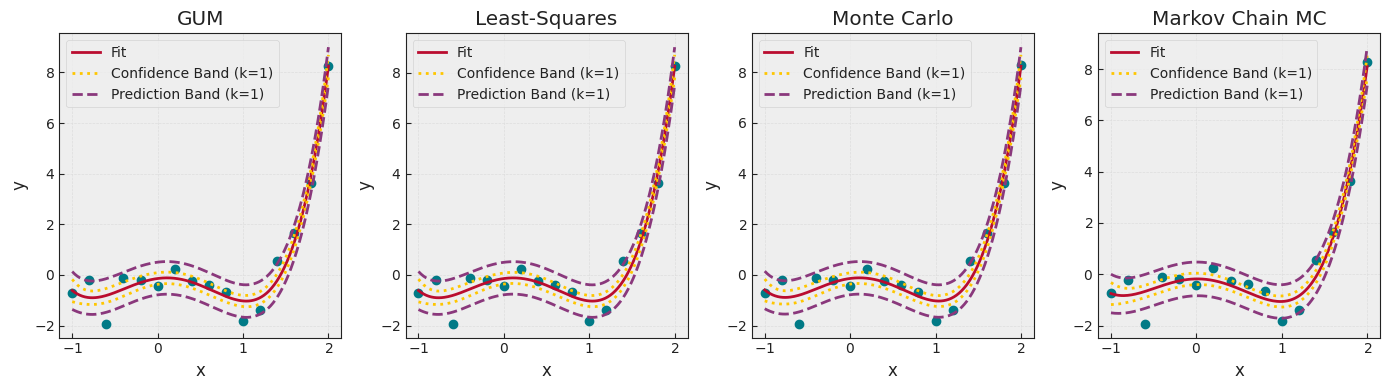

In [5]:
# Polynomial - must also specify the polyorder parameter.
uy = .5
x = np.linspace(-1, 2, num=16)
y = x**4 - 2*x**2 + np.random.normal(loc=0, scale=uy, size=len(x))

arr = curvefit.Array(x, y, uy=uy)
f = curvefit.CurveFit(arr, func='poly', polyorder=4)
out = f.calculate_all()
display(out)
plotit(out)

|Method (k=1)              | a         | b         | c        |
|-------------------------|---------|---------|---------|
|GUM Approximation         | 0.967 ± 0.086 | -1.57 ± 0.23 | 5.047 ± 0.028|
|Monte Carlo               | 0.969 ± 0.075 | -1.59 ± 0.24 | 5.046 ± 0.030|
|Least Squares             | 0.967 ± 0.075 | -1.57 ± 0.26 | 5.047 ± 0.031|
|Markov-Chain Monte Carlo  | 0.964 ± 0.072 | -1.65 ± 0.26 | 5.041 ± 0.031|

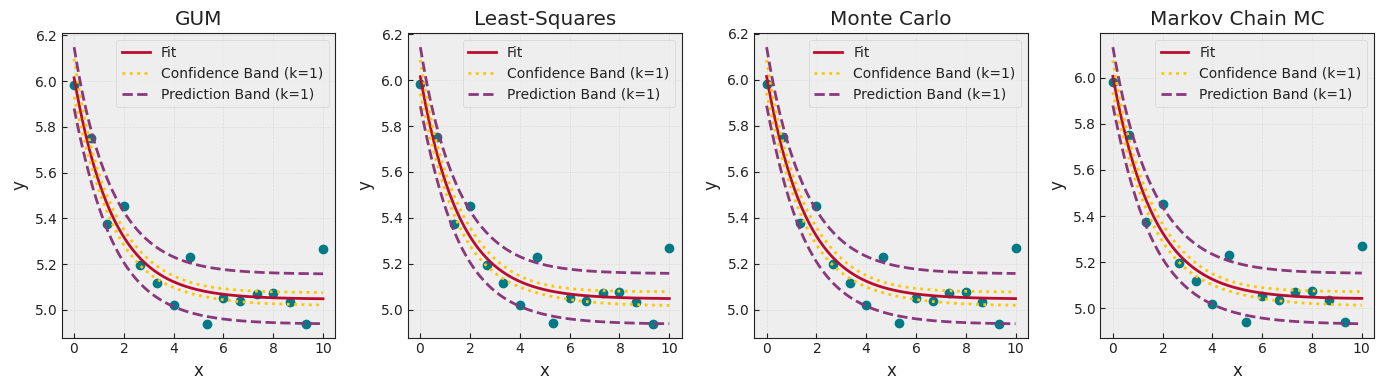

In [6]:
# Exponential
a, b = 2, 5
uy = .08
x = np.linspace(0, 10, num=16)
y = np.exp(-x/a) + b + np.random.normal(loc=0, scale=uy, size=len(x))

arr = curvefit.Array(x, y, uy=uy)
f = curvefit.CurveFit(func='exp', arr=arr, p0=(1, -2, 5))
out = f.calculate_all()
display(out)
plotit(out)

|Method (k=1)              | b        |
|-------------------------|---------|
|GUM Approximation         | 2.12 ± 0.15|
|Monte Carlo               | 2.12 ± 0.15|
|Least Squares             | 2.12 ± 0.14|
|Markov-Chain Monte Carlo  | 2.14 ± 0.15|

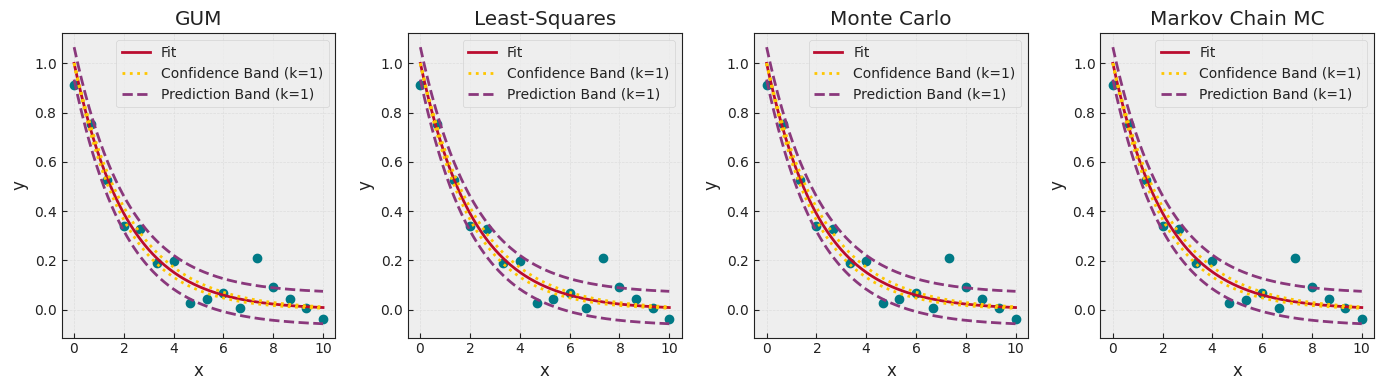

In [7]:
# A custom-defined exponential function as string expression with only one parameter
b = 2
uy = .06
x = np.linspace(0, 10, num=16)
y = np.exp(-x/b) + np.random.normal(loc=0, scale=uy, size=len(x))

arr = curvefit.Array(x, y, uy=uy)
f = curvefit.CurveFit(func='exp(-x/b)', arr=arr)
out = f.calculate_all()
display(out)
plotit(out)

|Method (k=1)              | a         | b        |
|-------------------------|---------|---------|
|GUM Approximation         | 144.65 ± 0.34 | 19.76 ± 0.27|
|Monte Carlo               | 144.64 ± 0.34 | 19.75 ± 0.27|
|Least Squares             | 144.65 ± 0.34 | 19.76 ± 0.28|
|Markov-Chain Monte Carlo  | 144.64 ± 0.33 | 19.77 ± 0.27|

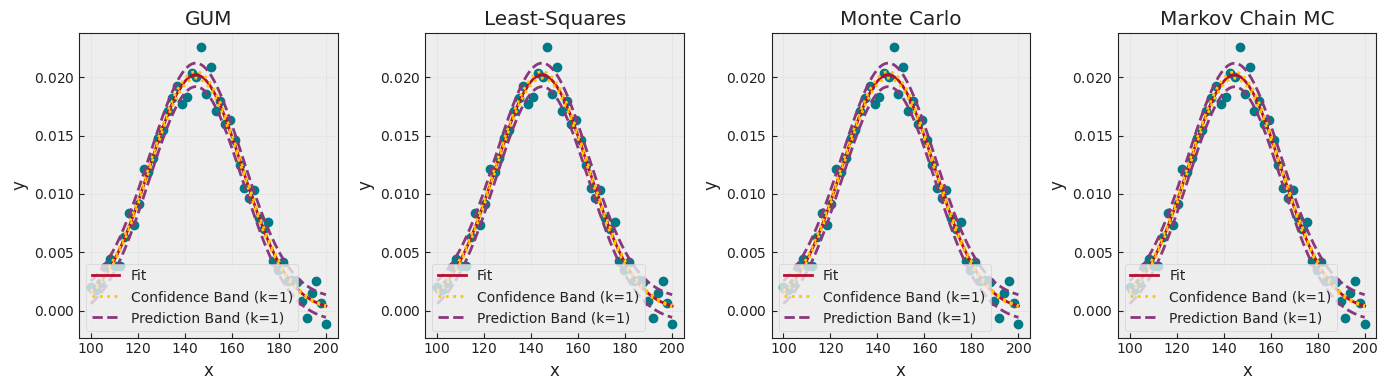

In [8]:
# Normal function as python callable - This one needs an initial guess p0 to converge
def func(x, a, b):
    return stats.norm.pdf(x, loc=a, scale=b)

a, b = 145, 20
uy = .001
x = np.linspace(100, 200, 50)
y = func(x, a, b) + np.random.normal(loc=0, scale=uy, size=len(x))

arr = curvefit.Array(x, y, uy=uy)
f = curvefit.CurveFit(func=func, arr=arr, p0=(a, b))
out = f.calculate_all()
display(out)
plotit(out)

|Method (k=1)              | a         | p         | z        |
|-------------------------|---------|---------|---------|
|GUM Approximation         | 2.723 ± 0.098 | 0.3934 ± 0.0031 | 0.987 ± 0.070|
|Monte Carlo               | 2.73 ± 0.100 | 0.3935 ± 0.0032 | 0.987 ± 0.071|
|Least Squares             | 2.723 ± 0.099 | 0.3934 ± 0.0033 | 0.987 ± 0.071|
|Markov-Chain Monte Carlo  | 2.72 ± 0.100 | 0.3934 ± 0.0031 | 0.988 ± 0.071|

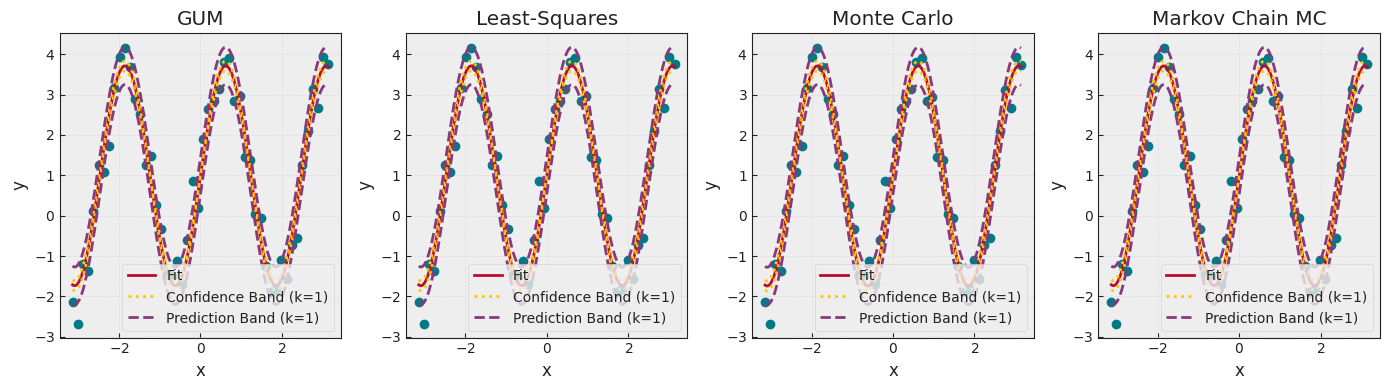

In [9]:
# sine function - Interestingly, monte carlo method needs an initial guess, but the others converge without.
def func(x, a, p, z):
    return a * np.sin(x/p) + z

a, p, z = 3, np.pi/8, 1
x = np.linspace(-np.pi, np.pi, 50)
uy = .5
y = func(x, a, p, z) + np.random.normal(loc=0, scale=uy, size=len(x))

arr = curvefit.Array(x, y, uy=uy)
f = curvefit.CurveFit(func=func, arr=arr, p0=(a, p, z))
out = f.calculate_all()
display(out)
plotit(out)

|Method (k=1)              | gammaG    | gammaL    | center    | base      | area     |
|-------------------------|---------|---------|---------|---------|---------|
|GUM Approximation         | 2.5 ± 130 | 0.00055 ± 3700 | 520 ± 170 | 0.00017 ± 0.56 | 1.0 ± 33|
|Monte Carlo               | 2.37 ± 0.27 | 0.38 ± 0.47 | 520.02 ± 0.10 | 0.00053 ± 0.0015 | 0.987 ± 0.063|
|Least Squares             | 2.51 ± 0.41 | 0.00055 ± 690 | 520.02 ± 0.10 | 0.00017 ± 0.0016 | 1.009 ± 0.082|
|Markov-Chain Monte Carlo  | 2.46 ± 0.23 | 0.32 ± 0.44 | 520.01 ± 0.10 | 0.00014 ± 0.0014 | 1.010 ± 0.060|

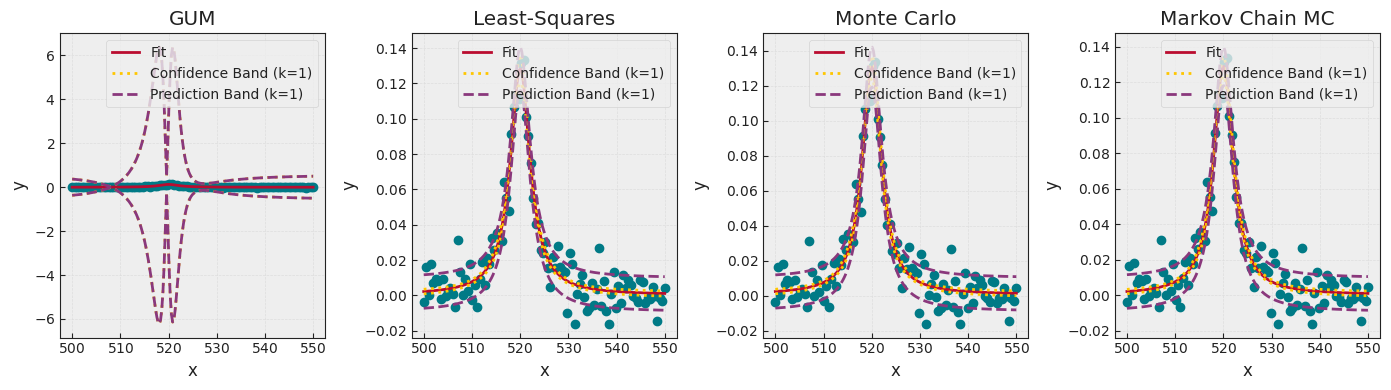

In [10]:
# Voigt function (used in Raman spectroscopy) defined in a custom Python callable function

from scipy.special import wofz

def voigt(x, gammaG, gammaL, center, base, area):
    ''' Voigt function, shifted/scaled. '''
    sigma = gammaL / np.sqrt(2 * np.log(2))
    vv = np.real(wofz((x-center + 1j*gammaG)/sigma/np.sqrt(2))) / sigma / np.sqrt(2*np.pi)
    vv = area*vv
    vv += base
    return vv

args = [2, 1.8, 520, 0, 1]
x = np.linspace(500, 550, 100)
uy = .01
y = voigt(x, *args) + np.random.normal(loc=0, scale=uy, size=len(x))

arr = curvefit.Array(x, y, uy=uy)
f = curvefit.CurveFit(func=voigt, arr=arr, p0=args)
out = f.calculate_all()
display(out)
plotit(out)

## Uncertainty in X values

The same tests can be repated with uncertainties in the X values. In this case, the curve fit will use orthogonal distance regression, or the York method if the model is linear. Compared to the ux=0 examples above, the uncertainty should be a bit higher for each parameter.

Note the Markov-Chain Monte Carlo method does not currently incorporte uncertainty in X values and will print a warning if given x uncertainties.

C:\Users\cjdelke\Code\uncertaintycalc\suncal\curvefit\curvefit_model.py:256: UserWarning: MCMC algorithm ignores u(x) != 0
  warnings.warn('MCMC algorithm ignores u(x) != 0')


|Method (k=1)              | b         | a        |
|-------------------------|---------|---------|
|GUM Approximation         | 0.524 ± 0.063 | -3.2 ± 1.9|
|Monte Carlo               | 0.518 ± 0.062 | -3.0 ± 1.9|
|Least Squares             | 0.529 ± 0.063 | -3.4 ± 1.9|
|Markov-Chain Monte Carlo  | 0.525 ± 0.060 | -3.3 ± 1.8|

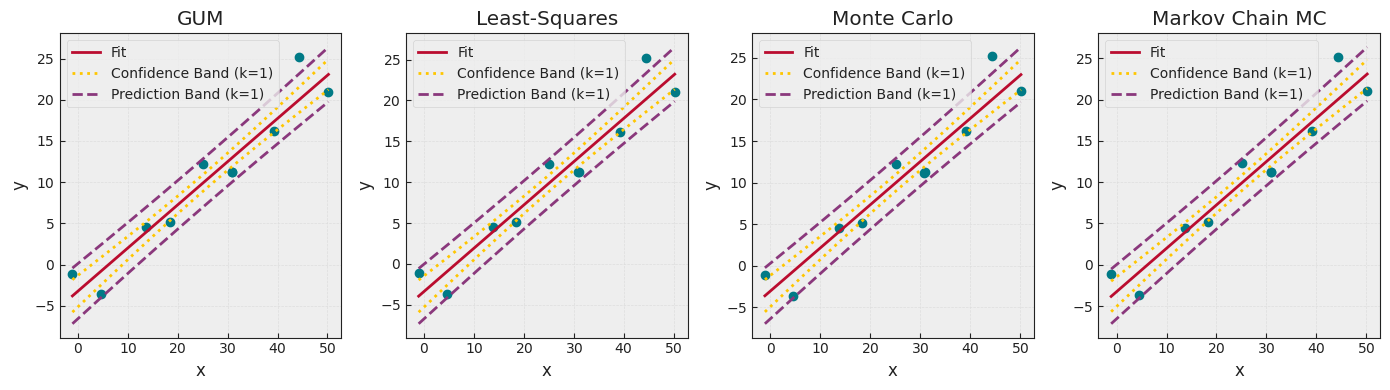

In [11]:
# Generate linear data with uncertainty in x and y
a, b = -5, .5
uy = 3
ux = 2
x = np.linspace(0,50,num=10)
y = a + b * x + np.random.normal(loc=0, scale=uy, size=len(x))
x = x + np.random.normal(loc=0, scale=ux, size=len(x))

# Compute the fit
arr = curvefit.Array(x, y, ux=ux, uy=uy)
f = curvefit.CurveFit(arr, p0=[-5, 0.5])
out = f.calculate_all()
display(out)
plotit(out)

|Method (k=1)              | a         | p         | z        |
|-------------------------|---------|---------|---------|
|GUM Approximation         | 2.81 ± 0.21 | 0.4061 ± 0.0092 | 0.90 ± 0.16|
|Monte Carlo               | 2.46 ± 0.21 | 0.4047 ± 0.0086 | 0.92 ± 0.14|
|Least Squares             | 3.47 ± 0.20 | 0.3971 ± 0.0066 | 0.86 ± 0.16|
|Markov-Chain Monte Carlo  | 2.81 ± 0.10 | 0.4061 ± 0.0032 | 0.901 ± 0.070|

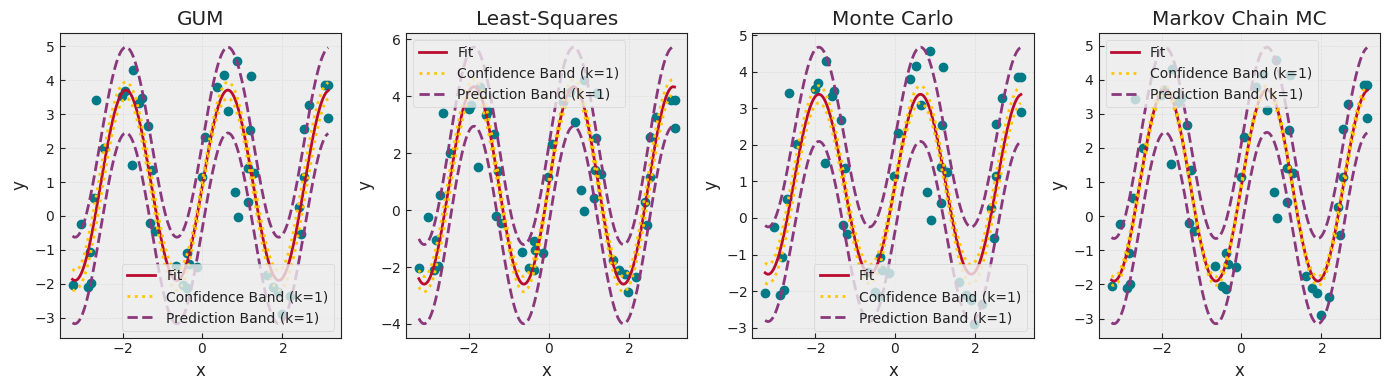

In [12]:
# sine function with uncertainty in x and y
def func(x, a, p, z):
    return a * np.sin(x/p) + z

a, p, z = 3, np.pi/8, 1
x = np.linspace(-np.pi, np.pi, 50)
uy = .5
ux = .2
y = func(x, a, p, z) + np.random.normal(loc=0, scale=uy, size=len(x))
x = x + np.random.normal(loc=0, scale=ux, size=len(x))

arr = curvefit.Array(x, y, ux=ux, uy=uy)
f = curvefit.CurveFit(func=func, arr=arr, p0=(a, p, z))
out = f.calculate_all()
display(out)
plotit(out)